In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [2]:
df = pd.read_csv(r'C:/1. Yuke/Master 1st semester/MBAN6110_Datascience/dataset files/sales_data.csv')

In [3]:
df

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
...,...,...,...,...,...
1045,Product_45,Region_7,78.69,8.0,2022-07-28
1046,Product_1,Region_6,NaN,8.0,2022-08-02
1047,Product_17,Region_2,114.37,11.0,2023-12-18
1048,NaN,Region_8,NaN,5.0,2023-12-27


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      946 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


Data type for each column should be correct except for the column Sale Date, in which it is an object, not a datetime.

In total, there are 1050 entries, however, there are missing values for column - Product, Region, Price, and Units sold. 

In [5]:
# Converting data type of Sale Date to datetime 
df['Sale Date'] = pd.to_datetime(df['Sale Date'], errors = 'coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Product     947 non-null    object        
 1   Region      946 non-null    object        
 2   Price       945 non-null    float64       
 3   Units Sold  946 non-null    float64       
 4   Sale Date   1050 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 41.1+ KB


In [6]:
df.describe(include = 'all')

C:\Users\kryst\AppData\Local\Temp/ipykernel_33016/4220128335.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include = 'all')


,Product,Region,Price,Units Sold,Sale Date
count,947,946,945.000000,946.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_45,Region_9,NaN,NaN,2022-07-28 00:00:00
freq,28,109,NaN,NaN,2
first,NaN,NaN,NaN,NaN,2022-01-01 00:00:00
last,NaN,NaN,NaN,NaN,2024-09-26 00:00:00
mean,NaN,NaN,107.598688,10.048626,NaN
std,NaN,NaN,124.020322,3.172261,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.430000,8.000000,NaN


Notice that the max price is 2143.3, which is considered much higher than its 75 percentile value and the mean, this could be an outlier. 

The max of Units sold -- 22, is also much higher than the 75 percentile and the mean, more investigation is needed for this specofic sale. 

There are in total 50 unique products sold under this e-commerce company, and there are 10 unique regions under the company's sales range. 

Product_45 is the product that was sold the most frequent among the 50 products; 
Region_9 is the region that has the most sales among the 10 regions. 

Also notice that the max date is in 2024, therefore, the analysis is about constructing sales strategy for the year of 2025. 

In [7]:
df.isna().sum()

Product       103
Region        104
Price         105
Units Sold    104
Sale Date       0
dtype: int64

Above shows the numbers of missing values under each column, and more investigation should be done for these null values. 

With null values, it would be difficult to conduct computations using price and units sold - for example, calculating total revenue generated for each sales, mean values of total sales... as null values cannot be computed. The values would have to be converted to either a number, or be dropped from the dataframe. 


<AxesSubplot:xlabel='Price', ylabel='Count'>

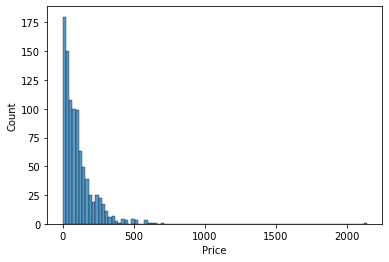

In [12]:
sns.histplot(df['Price'])

# Notice there is one outlier - it would be better if we remove the outlier to get an average
# value of Price

In [42]:
df[df['Price'] == 2143.300000]
# found outlier 

,Product,Region,Price,Units Sold,Sale Date,Sales
969,Product_15,Region_8,2143.3,5.0,2024-08-27,10716.5


In [13]:
df1 = df.drop(969, axis = 0, inplace = False)

df1 # This is a new dataframe without that Price outlier

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
...,...,...,...,...,...
1045,Product_45,Region_7,78.69,8.0,2022-07-28
1046,Product_1,Region_6,NaN,8.0,2022-08-02
1047,Product_17,Region_2,114.37,11.0,2023-12-18
1048,NaN,Region_8,NaN,5.0,2023-12-27


<AxesSubplot:xlabel='Price', ylabel='Count'>

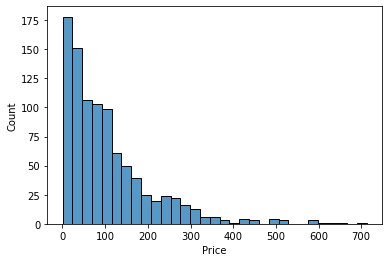

In [15]:
sns.histplot(df1['Price'])

In [18]:
df1['Price'].describe()


count    944.000000
mean     105.442225
std      104.871948
min        0.200000
25%       29.420000
50%       77.975000
75%      142.397500
max      713.290000
Name: Price, dtype: float64

There are still a few outliers shown on the graph - for example, there are a few ones greater than 400; the 75% percentile is only at 142.3975 and majority of the prices fall under the range between 0 to 200, therefore, more outliers may be able to removed to get a more generalized mean value for the price. 

95.65041214750536

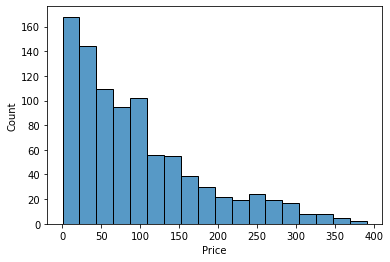

In [24]:
df1 = df1[df1['Price'] < 400]

sns.histplot(df1['Price'])
# Although the graph is still right-skewed, outliers are removed and most of the values are within this range
# Therefore, we can extract the mean value from this range as a number in replacement of the null values 

df1['Price'].mean()

In [25]:
df['Price'] = df['Price'].fillna(95.65041214750536)

df

# Completed filling nulls under the Price column 

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.960000,10.0,2022-01-01
1,NaN,Region_1,175.780000,8.0,2022-01-02
2,Product_46,Region_3,20.430000,12.0,2022-01-03
3,Product_36,Region_1,12.770000,10.0,2022-01-04
4,Product_17,Region_6,125.690000,6.0,2022-01-05
...,...,...,...,...,...
1045,Product_45,Region_7,78.690000,8.0,2022-07-28
1046,Product_1,Region_6,95.650412,8.0,2022-08-02
1047,Product_17,Region_2,114.370000,11.0,2023-12-18
1048,NaN,Region_8,95.650412,5.0,2023-12-27


<AxesSubplot:xlabel='Units Sold', ylabel='Count'>

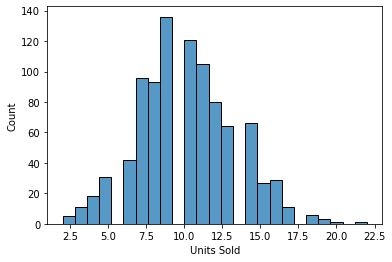

In [26]:
sns.histplot(df['Units Sold'])


This histogram shows that the distribution of the Units Sold graph is relatively normal, therefore, the mean value from this distribution may be selected and replaced the null values of Units Sold.  

In [27]:
df['Units Sold'].mean()

10.048625792811839

In [29]:
df['Units Sold'] = df['Units Sold'].fillna(10.048625792811839)

df.info()

# Completed filling in null values for the column Units Sold as well 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Product     947 non-null    object        
 1   Region      946 non-null    object        
 2   Price       1050 non-null   float64       
 3   Units Sold  1050 non-null   float64       
 4   Sale Date   1050 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 41.1+ KB


The rest of null values are under the columns Product and Region, since the Product name and area are not even specified, and it would be difficult to track back the missing information, therefore, keeping these null values would not contribute to the final analysis, they should be dropped.  

In [31]:
df = df.dropna()

df.info()

# Now, this dataframe has no null values at all

<class 'pandas.core.frame.DataFrame'>
Int64Index: 853 entries, 2 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Product     853 non-null    object        
 1   Region      853 non-null    object        
 2   Price       853 non-null    float64       
 3   Units Sold  853 non-null    float64       
 4   Sale Date   853 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 40.0+ KB


Also noticing that there are quite a few duplicated rows within the dataset, since this is a sales information dataset that maybe entered manually by the sales representative, it is possible that more sales are made on the same date, or the reps were making adjustments on the sales number by doubling the entries. More validation and investigation is needed, therefore, I chose not to remove the duplicates for now to wait for the validation. 

In [32]:
# create a new column - computing the revenue generated for each sale by 
# use price to multiply units sold
df['Sales'] = df['Price'] * df['Units Sold']

df

,Product,Region,Price,Units Sold,Sale Date,Sales
2,Product_46,Region_3,20.430000,12.0,2022-01-03,245.160000
3,Product_36,Region_1,12.770000,10.0,2022-01-04,127.700000
4,Product_17,Region_6,125.690000,6.0,2022-01-05,754.140000
5,Product_45,Region_1,8.630000,11.0,2022-01-06,94.930000
6,Product_31,Region_3,23.730000,6.0,2022-01-07,142.380000
...,...,...,...,...,...,...
1044,Product_48,Region_10,23.570000,6.0,2024-02-28,141.420000
1045,Product_45,Region_7,78.690000,8.0,2022-07-28,629.520000
1046,Product_1,Region_6,95.650412,8.0,2022-08-02,765.203297
1047,Product_17,Region_2,114.370000,11.0,2023-12-18,1258.070000


In [33]:
df.describe(include = 'all')

C:\Users\kryst\AppData\Local\Temp/ipykernel_33016/4220128335.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include = 'all')


,Product,Region,Price,Units Sold,Sale Date,Sales
count,853,853,853.000000,853.000000,853,853.000000
unique,50,10,NaN,NaN,810,NaN
top,Product_5,Region_9,NaN,NaN,2022-07-28 00:00:00,NaN
freq,28,101,NaN,NaN,2,NaN
first,NaN,NaN,NaN,NaN,2022-01-03 00:00:00,NaN
last,NaN,NaN,NaN,NaN,2024-09-26 00:00:00,NaN
mean,NaN,NaN,107.271251,10.086738,NaN,1057.063393
std,NaN,NaN,122.687992,3.076829,NaN,1125.785161
min,NaN,NaN,0.200000,2.000000,NaN,0.990000
25%,NaN,NaN,34.160000,8.000000,NaN,301.950000


After cleaning the dataset, max price of 2143.300000 stays the same as an outlier. 

The max of Units sold -- 22, also stays the same. 

Product_5 is now changed to the product that was sold the most frequent among the 50 products; 
Region_9 is still the region that has the most frequent sales among the 10 regions. 

<AxesSubplot:xlabel='Price', ylabel='Units Sold'>

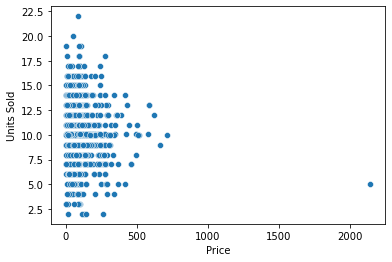

In [36]:
# Observe relationship between Price and Units sold 
# hypothesis - as price goes up, units sold would be decreasing 

sns.scatterplot(x = 'Price', y = 'Units Sold', data = df)

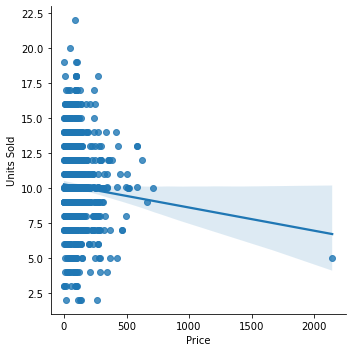

In [37]:
sns.lmplot(x = 'Price', y = 'Units Sold', data = df, fit_reg = True)

These two graphs do not show a clear linear relationship between the two variables, the trendline also does not really fit the data. Therefore, there is no clear relationship between Price and Units Sold. 

<AxesSubplot:xlabel='Region', ylabel='Sales'>

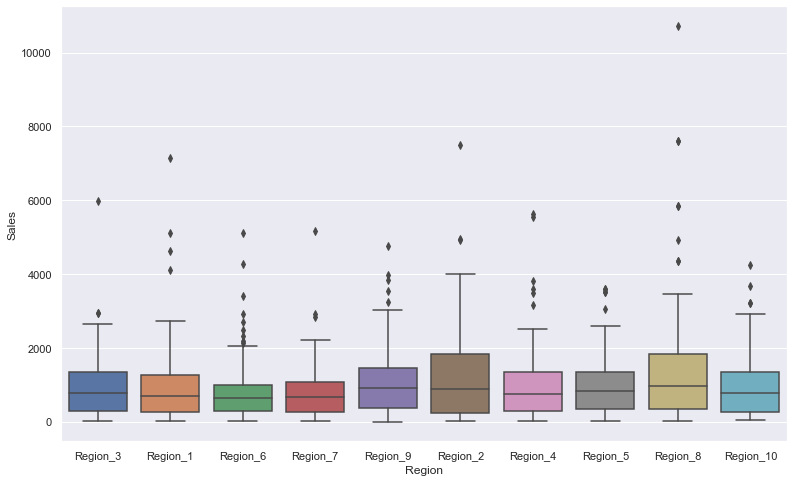

In [53]:
sns.set(rc={"figure.figsize":(13, 8)}) # width=13, #height=8

sns.boxplot(data = df, x = 'Region', y = 'Sales')

In this boxplot, notice that all regions have some outliers, and all of them have their interquartile range fall between the range of 0 and 2000. Region_2 and Region_8 seem to be the two regions with the widest interquartile range (ie. upper quartile is very close to 2000), the rest of them seem to have similar ranges comparing to each other, in which the total sales numbers across the 10 regions do not vary much. 

Looking at the median sales across these 10 regions, most of them are quite similar except for a few ones(ie. Region 9, 2 and 8), in which these may be the ones with higher sales. 

In [54]:
# To look at regions separately: 

df_region_sum = df.groupby('Region').sum()

df_region_sum = df_region_sum.sort_values(['Sales'])

df_region_sum


,Price,Units Sold,Sales
Region,,,
Region_7,6361.863297,670.486258,60321.467389
Region_6,7156.944946,834.389006,72438.131446
Region_1,7531.493709,751.243129,75131.989355
Region_3,8313.805770,874.340381,80265.430193
Region_5,9120.753709,898.486258,89230.509374
Region_10,9290.792885,942.389006,91199.103881
Region_2,9321.872473,747.194503,93532.189106
Region_4,9743.205358,944.243129,95463.726422
Region_9,10769.251236,1030.534884,109335.373073


Grouped by regions, using .sum() function, we are able to see Region_8 is the area that generated the most sales, Region_7 is the area that generated the least sales. 

In [56]:
df_product_count = df.groupby('Product').count()

df_product_count.sort_values(['Price'])


,Region,Price,Units Sold,Sale Date,Sales
Product,,,,,
Product_3,8,8,8,8,8
Product_11,10,10,10,10,10
Product_12,11,11,11,11,11
Product_38,12,12,12,12,12
Product_49,12,12,12,12,12
Product_36,12,12,12,12,12
Product_47,13,13,13,13,13
Product_18,13,13,13,13,13
Product_26,13,13,13,13,13


Here, Product_31 is the product sold the most from the company, Product_12 is the product sold the least from the company. 

In [57]:
# Region_1: 

region_1 = df.groupby('Region').get_group('Region_1')

# Sort all product sales made within Region_1 

region_1.groupby('Product').sum().sort_values('Sales', ascending = False)


,Price,Units Sold,Sales
Product,,,
Product_41,962.980000,20.000000,9629.800000
Product_35,858.200824,36.048626,8206.951372
Product_30,655.710000,39.048626,7003.258478
Product_46,725.600412,42.000000,5169.803297
Product_50,502.150000,34.000000,5028.240000
Product_20,253.640000,29.000000,4250.630000
Product_1,318.420000,42.000000,3071.100000
Product_43,224.170412,37.000000,2785.695358
Product_7,191.300824,26.000000,2486.910716


Notice here, for region 1, the top 5 products generated the most sales are 41, 35, 30, 46, 50; 
The 5 products generated the lowest sales are 42, 44, 40, 4, 16. 

In [82]:
import matplotlib.pyplot  as plt 

([<matplotlib.patches.Wedge at 0x28ffd975490>,
 [Text(3.299952954864508, 0.01762088763379664, 'Product_36'),
  Text(3.299645936741432, 0.04833934366289014, 'Product_45'),
  Text(3.2978048845643637, 0.12034510103624503, 'Product_45'),
  Text(3.2912372369531404, 0.24032779717099143, 'Product_33'),
  Text(3.2774405907082973, 0.3852053664964294, 'Product_13'),
  Text(3.2543416148996913, 0.5470472132568357, 'Product_34'),
  Text(3.2273638360525765, 0.688565661168199, 'Product_2'),
  Text(3.194702428964622, 0.826968191871698, 'Product_13'),
  Text(3.123302450061653, 1.0653552484682636, 'Product_35'),
  Text(3.011756491152582, 1.3488227600393936, 'Product_36'),
  Text(2.9516550453753525, 1.475714231519852, 'Product_13'),
  Text(2.832929357631714, 1.692486707383064, 'Product_2'),
  Text(2.698801951165237, 1.8990703063306296, 'Product_46'),
  Text(2.610447461717487, 2.018802627701066, 'Product_6'),
  Text(2.011225305264426, 2.6162898867411495, 'Product_35'),
  Text(1.2408908388891338, 3.0578080

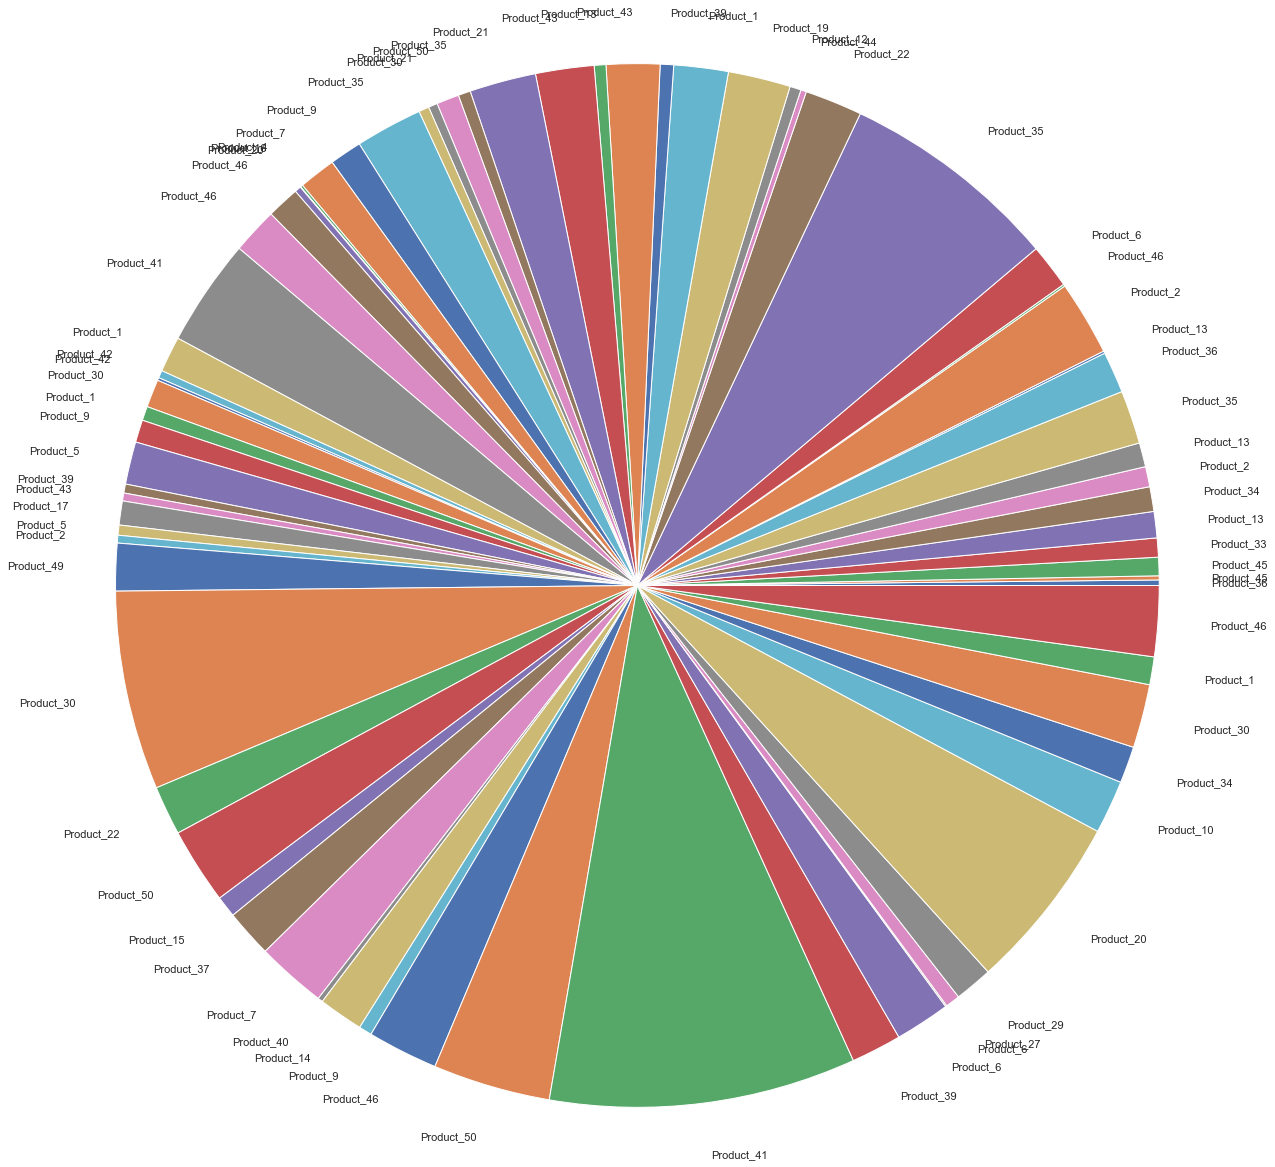

In [83]:
plt.pie(region_1['Sales'], labels = region_1['Product'], radius = 3)

# Gives the same result as the above sorted dataframe

In [92]:
top5 = region_1.groupby('Product').sum().sort_values('Sales', ascending = False).head()

top5

,Price,Units Sold,Sales
Product,,,
Product_41,962.980000,20.000000,9629.800000
Product_35,858.200824,36.048626,8206.951372
Product_30,655.710000,39.048626,7003.258478
Product_46,725.600412,42.000000,5169.803297
Product_50,502.150000,34.000000,5028.240000


In [94]:
bottom5 = region_1.groupby('Product').sum().sort_values('Sales', ascending = False).tail()

bottom5

,Price,Units Sold,Sales
Product,,,
Product_42,14.31,32.0,239.22
Product_44,26.09,5.0,130.45
Product_40,19.25,6.0,115.50
Product_4,7.90,7.0,55.30
Product_16,0.96,11.0,10.56


In [85]:
# Region_2


region_2 = df.groupby('Region').get_group('Region_2')

# Sort all product sales made within Region_2

region_2.groupby('Product').sum().sort_values('Sales', ascending = False).head()


,Price,Units Sold,Sales
Product,,,
Product_26,746.870000,26.000000,9208.980000
Product_22,613.040000,19.048626,6034.542241
Product_16,411.430000,34.000000,6019.740000
Product_2,545.590000,26.000000,5246.070000
Product_34,476.730412,37.000000,5146.956182


In [86]:
region_2.groupby('Product').sum().sort_values('Sales', ascending = False).tail()

,Price,Units Sold,Sales
Product,,,
Product_21,25.18,12.000000,302.160000
Product_6,60.41,5.000000,302.050000
Product_30,35.44,6.000000,212.640000
Product_13,7.23,16.000000,115.680000
Product_44,6.93,10.048626,69.636977


For region_2, the top 5 products generated the most sales are 26, 22, 16, 2, 34; 
The 5 products generated the lowest sales are 21, 6, 30, 13, 44. 

In [95]:
# append the top 5 and bottom 5 from Region_2 to the dataframe created - top5 and bottom5

top5 = top5.append(region_2.groupby('Product').sum().sort_values('Sales', ascending = False).head())

top5

,Price,Units Sold,Sales
Product,,,
Product_41,962.980000,20.000000,9629.800000
Product_35,858.200824,36.048626,8206.951372
Product_30,655.710000,39.048626,7003.258478
Product_46,725.600412,42.000000,5169.803297
Product_50,502.150000,34.000000,5028.240000
Product_26,746.870000,26.000000,9208.980000
Product_22,613.040000,19.048626,6034.542241
Product_16,411.430000,34.000000,6019.740000
Product_2,545.590000,26.000000,5246.070000


In [96]:
bottom5 = bottom5.append(region_2.groupby('Product').sum().sort_values('Sales', ascending = False).tail())

bottom5

,Price,Units Sold,Sales
Product,,,
Product_42,14.31,32.000000,239.220000
Product_44,26.09,5.000000,130.450000
Product_40,19.25,6.000000,115.500000
Product_4,7.90,7.000000,55.300000
Product_16,0.96,11.000000,10.560000
Product_21,25.18,12.000000,302.160000
Product_6,60.41,5.000000,302.050000
Product_30,35.44,6.000000,212.640000
Product_13,7.23,16.000000,115.680000


In [87]:
# Region_3


region_3 = df.groupby('Region').get_group('Region_3')

# Sort all product sales made within Region_3 

region_3.groupby('Product').sum().sort_values('Sales', ascending = False).head()


,Price,Units Sold,Sales
Product,,,
Product_48,740.830000,29.000000,7255.890000
Product_31,694.020000,28.000000,6196.150000
Product_30,532.360000,57.048626,5516.761903
Product_41,465.210824,50.000000,5337.034837
Product_20,527.700824,34.000000,4703.105770


In [88]:
region_3.groupby('Product').sum().sort_values('Sales', ascending = False).tail()

,Price,Units Sold,Sales
Product,,,
Product_39,22.56,9.0,203.04
Product_17,22.20,9.0,199.80
Product_40,17.52,11.0,192.72
Product_35,6.26,15.0,93.90
Product_3,15.05,3.0,45.15


For region_3, the top 5 products generated the most sales are 48, 31, 30, 41, 20; 
The 5 products generated the lowest sales are 39, 17, 40, 35, 3. 

In [99]:
# append the top 5 and bottom 5 from Region_3 to the dataframe created - top5 and bottom5

top5 = top5.append(region_3.groupby('Product').sum().sort_values('Sales', ascending = False).head())

bottom5 = bottom5.append(region_3.groupby('Product').sum().sort_values('Sales', ascending = False).tail())

In [89]:
# Region_4


region_4 = df.groupby('Region').get_group('Region_4')

# Sort all product sales made within Region_4

region_4.groupby('Product').sum().sort_values('Sales', ascending = False).head()


,Price,Units Sold,Sales
Product,,,
Product_31,1140.620000,79.000000,12744.260000
Product_16,433.170000,13.000000,5631.210000
Product_50,417.620412,70.000000,4863.544534
Product_37,413.320000,24.000000,4524.560000
Product_2,442.850412,19.048626,4349.736585


In [90]:
region_4.groupby('Product').sum().sort_values('Sales', ascending = False).tail()

,Price,Units Sold,Sales
Product,,,
Product_47,24.24,10.0,242.40
Product_36,43.74,4.0,174.96
Product_18,12.35,9.0,111.15
Product_43,6.07,4.0,24.28
Product_24,0.22,10.0,2.20


For region_4, the top 5 products generated the most sales are 31, 16, 50, 37, 2; 
The 5 products generated the lowest sales are 47, 36, 18, 43, 24. 

In [100]:
# append the top 5 and bottom 5 from Region_4 to the dataframe created - top5 and bottom5

top5 = top5.append(region_4.groupby('Product').sum().sort_values('Sales', ascending = False).head())

bottom5 = bottom5.append(region_4.groupby('Product').sum().sort_values('Sales', ascending = False).tail())

In [103]:
# Region_5


region_5 = df.groupby('Region').get_group('Region_5')

# Sort all product sales made within Region_5

region_5.groupby('Product').sum().sort_values('Sales', ascending = False).head()


,Price,Units Sold,Sales
Product,,,
Product_6,598.760000,24.000000,7185.120000
Product_10,583.060000,24.000000,6996.720000
Product_29,710.170412,48.048626,6859.155199
Product_40,832.520000,22.000000,5782.920000
Product_17,469.390412,31.048626,4616.474333


In [104]:
region_5.groupby('Product').sum().sort_values('Sales', ascending = False).tail()

,Price,Units Sold,Sales
Product,,,
Product_37,109.11,15.000000,403.470000
Product_47,39.90,10.000000,399.000000
Product_33,10.39,17.000000,91.290000
Product_39,8.70,21.000000,71.450000
Product_50,1.36,10.048626,13.666131


For region_5, the top 5 products generated the most sales are 6, 10, 29, 40, 17; 
The 5 products generated the lowest sales are 37, 47, 33, 39, 50. 

In [105]:
# append the top 5 and bottom 5 from Region_5 to the dataframe created - top5 and bottom5

top5 = top5.append(region_5.groupby('Product').sum().sort_values('Sales', ascending = False).head())

bottom5 = bottom5.append(region_5.groupby('Product').sum().sort_values('Sales', ascending = False).tail())

In [106]:
# Region_6

region_6 = df.groupby('Region').get_group('Region_6')

# Sort all product sales made within Region_6

region_6.groupby('Product').sum().sort_values('Sales', ascending = False).head()


,Price,Units Sold,Sales
Product,,,
Product_15,605.710412,21.000000,6152.754534
Product_28,366.580412,40.000000,5342.707419
Product_19,529.000000,31.000000,5316.560000
Product_40,474.850000,18.048626,4671.555560
Product_39,460.300000,31.048626,4173.497082


In [107]:
region_6.groupby('Product').sum().sort_values('Sales', ascending = False).tail()

,Price,Units Sold,Sales
Product,,,
Product_9,15.78,10.048626,158.567315
Product_50,8.64,12.000000,103.680000
Product_31,14.20,7.000000,99.400000
Product_37,6.49,12.000000,77.880000
Product_3,0.54,14.000000,7.560000


For region_6, the top 5 products generated the most sales are 15, 28, 19, 40, 39; 
The 5 products generated the lowest sales are 9, 50, 31, 37, 3. 

In [108]:
# append the top 5 and bottom 5 from Region_6 to the dataframe created - top5 and bottom5

top5 = top5.append(region_6.groupby('Product').sum().sort_values('Sales', ascending = False).head())

bottom5 = bottom5.append(region_6.groupby('Product').sum().sort_values('Sales', ascending = False).tail())

In [109]:
# Region_7

region_7 = df.groupby('Region').get_group('Region_7')

# Sort all product sales made within Region_7

region_7.groupby('Product').sum().sort_values('Sales', ascending = False).head()

,Price,Units Sold,Sales
Product,,,
Product_14,604.840000,32.048626,6062.667738
Product_43,420.820412,42.000000,3654.782885
Product_31,442.240000,14.000000,3095.680000
Product_16,244.050000,12.000000,2928.600000
Product_44,347.180412,22.000000,2883.707007


In [110]:
region_7.groupby('Product').sum().sort_values('Sales', ascending = False).tail()

,Price,Units Sold,Sales
Product,,,
Product_11,41.78,14.000000,584.920000
Product_5,47.79,26.097252,465.810719
Product_7,31.10,12.000000,373.200000
Product_4,20.20,13.000000,262.600000
Product_10,33.68,7.000000,235.760000


For region_7, the top 5 products generated the most sales are 14, 43, 31, 16, 44; 
The 5 products generated the lowest sales are 11, 5, 7, 4, 10. 

In [111]:
# append the top 5 and bottom 5 from Region_7 to the dataframe created - top5 and bottom5

top5 = top5.append(region_7.groupby('Product').sum().sort_values('Sales', ascending = False).head())

bottom5 = bottom5.append(region_7.groupby('Product').sum().sort_values('Sales', ascending = False).tail())

In [114]:
# Region_8

region_8 = df.groupby('Region').get_group('Region_8')

# Sort all product sales made within Region_8

region_8.groupby('Product').sum().sort_values('Sales', ascending = False).head()

,Price,Units Sold,Sales
Product,,,
Product_26,1170.34,26.0,15214.42
Product_15,2375.10,40.0,13445.57
Product_23,799.73,37.0,9672.49
Product_48,595.57,28.0,8337.98
Product_7,628.68,20.0,6286.80


In [115]:
region_8.groupby('Product').sum().sort_values('Sales', ascending = False).tail()

,Price,Units Sold,Sales
Product,,,
Product_1,26.44,11.000000,290.840000
Product_3,18.67,13.000000,242.710000
Product_6,23.79,10.048626,239.056808
Product_10,22.51,10.000000,225.100000
Product_32,2.16,7.000000,15.120000


For region_8, the top 5 products generated the most sales are 26, 15, 23, 48, 7; 
The 5 products generated the lowest sales are 1, 3, 6, 10, 32. 

In [116]:
# append the top 5 and bottom 5 from Region_8 to the dataframe created - top5 and bottom5

top5 = top5.append(region_8.groupby('Product').sum().sort_values('Sales', ascending = False).head())

bottom5 = bottom5.append(region_8.groupby('Product').sum().sort_values('Sales', ascending = False).tail())

In [117]:
# Region_9

region_9 = df.groupby('Region').get_group('Region_9')

# Sort all product sales made within Region_9

region_9.groupby('Product').sum().sort_values('Sales', ascending = False).head()

,Price,Units Sold,Sales
Product,,,
Product_4,587.770000,60.0,6517.300000
Product_34,662.450412,32.0,5937.504534
Product_40,508.550000,43.0,5806.870000
Product_2,392.370000,27.0,5197.150000
Product_33,517.040000,47.0,4813.710000


In [118]:
region_9.groupby('Product').sum().sort_values('Sales', ascending = False).tail()

,Price,Units Sold,Sales
Product,,,
Product_27,55.57,5.0,277.85
Product_32,27.86,7.0,195.02
Product_36,7.14,7.0,49.98
Product_23,4.14,12.0,49.68
Product_9,2.49,9.0,22.41


For region_9, the top 5 products generated the most sales are 4, 34, 40, 2, 33; 
The 5 products generated the lowest sales are 27, 32, 36, 23, 9. 

In [119]:
# append the top 5 and bottom 5 from Region_9 to the dataframe created - top5 and bottom5

top5 = top5.append(region_9.groupby('Product').sum().sort_values('Sales', ascending = False).head())

bottom5 = bottom5.append(region_9.groupby('Product').sum().sort_values('Sales', ascending = False).tail())

In [120]:
# Region_10 

region_10 = df.groupby('Region').get_group('Region_10')

# Sort all product sales made within Region_10

region_10.groupby('Product').sum().sort_values('Sales', ascending = False).head()

,Price,Units Sold,Sales
Product,,,
Product_14,498.630412,56.000000,7062.084946
Product_8,603.880000,53.048626,6883.740169
Product_29,920.400000,14.000000,6442.800000
Product_13,453.710000,30.000000,4843.390000
Product_7,282.460000,13.000000,3671.980000


In [121]:
region_10.groupby('Product').sum().sort_values('Sales', ascending = False).tail()

,Price,Units Sold,Sales
Product,,,
Product_30,30.97,9.000000,278.730000
Product_38,33.79,7.000000,236.530000
Product_11,8.93,10.048626,89.734228
Product_10,12.86,6.000000,77.160000
Product_49,9.39,8.000000,75.120000


For region_10, the top 5 products generated the most sales are 14, 8, 29, 13, 7; 
The 5 products generated the lowest sales are 30, 38, 11, 10, 49. 

In [122]:
# append the top 5 and bottom 5 from Region_10 to the dataframe created - top5 and bottom5

top5 = top5.append(region_10.groupby('Product').sum().sort_values('Sales', ascending = False).head())

bottom5 = bottom5.append(region_10.groupby('Product').sum().sort_values('Sales', ascending = False).tail())

In [124]:
top5.groupby('Product').count().sort_values('Price', ascending = False)

,Price,Units Sold,Sales
Product,,,
Product_31,4,4,4
Product_48,3,3,3
Product_2,3,3,3
Product_41,3,3,3
Product_30,3,3,3
Product_40,3,3,3
Product_16,3,3,3
Product_7,2,2,2
Product_20,2,2,2


In [125]:
bottom5.groupby('Product').count().sort_values('Price', ascending = False)

,Price,Units Sold,Sales
Product,,,
Product_10,3,3,3
Product_3,3,3,3
Product_9,2,2,2
Product_39,2,2,2
Product_37,2,2,2
Product_36,2,2,2
Product_40,2,2,2
Product_32,2,2,2
Product_30,2,2,2


Based on the above tables of all 10 regions, the sales generated by different products in each region are listed; The top 5 products generating the most sales and bottom 5 products generating the least sales for each region are summarized as well. For sales representative or regional representative working in each region, their sales strategy for next year is to put more focus on the bottom 5 products by understanding the reason behind their low sales, coming up with better marketing or advertising strategy to promote these products, and maintaining the high sales volume of those top 5 products. 




The top5 and bottom5 dataframes integrated all the top 5 and bottom 5 products across the 10 regions, and by sorting the dataframes, it is noted that there are a few products that have appeared as top 5 or bottom 5 for several regions (ie. Product 31 being the top 5 products in 4 regions; Product 3 being the bottom 5 products in 3 regions). For products that have marked as the bottom 5 products at least two times, more investigation should be conducted on these products, the company should work on understanding the reason of the low sales (ie. product is outdated, or pricing is unreasonable), this may require more information from the customers or market to support the reasoning. For products that have marked as the top 5 products for at least two times, companies could continue the same sales strategy and keep the same pricing for now, and to maintain these products' high sales, constant improvement, upgrades and feedback should be made to achieve customers' high satisfactions. 

Some recommendations I have for the business are: Firstly, I noticed for majority of the products, the prices varied for the same product, even if the sales dates were very close. More validation and investigation should be done on the pricing of each product to understand why this is happening (ie. could be due to different pack sizes of the products, or other specification differences of the products). By validating the prices and categorizing the sizes for each product, it may be easier to understand the sales performances and revenue generated from each product. Another recommendation I would give to the company is to improve the data quality of its sales information. Missing cells and duplicated rows could all be challenges when analyzing the data and creating business insights. It would be much more time-effective if a regular data quality assurance could be conducted by the company to ensure the accuracy and intergrity of the dataset, which is also significantly beneficial for making analysis based on these datasets. 